<a href="https://colab.research.google.com/github/vishnupriya45/e-learning-site/blob/main/Copy_of_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
from datasets import Dataset


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns





In [ ]:
# Load dataset
df = pd.read_csv('/content/flipkart dataset.csv')
df

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114
...,...,...,...,...,...,...,...,...,...
9369,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,4,Good quality product,this head phnes give good base in pluged ears ...,Bhimavaram,"Apr, 2018",0,0
9370,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,5,Awesome,This so far is one of the best headphones I've...,Ettimadai,"Apr, 2018",0,0
9371,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,4,Really Nice,I am a BASS LOVER and all others like me read ...,Guntur District,"Apr, 2018",0,0
9372,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,5,Super!,After use of one month........ It is an excell...,Kothamangalam,"Apr, 2018",0,0


In [ ]:
#Data cleaning and pre processing
# Function to clean text data
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

# Clean the 'review' column
df['cleaned_review'] = df['review'].apply(lambda x: clean_text(str(x)))

# Convert 'date' column to datetime format
def convert_date(date_str):
    try:
        if 'months ago' in date_str:
            months_ago = int(date_str.split()[0])
            return datetime.now() - pd.DateOffset(months=months_ago)
        elif 'years ago' in date_str:
            years_ago = int(date_str.split()[0])
            return datetime.now() - pd.DateOffset(years=years_ago)
        else:
            return datetime.strptime(date_str, '%b, %Y')
    except Exception as e:
        return np.nan

df['date'] = df['date'].apply(convert_date)

# Handle missing values by dropping rows with NaN in critical columns
df.dropna(subset=['cleaned_review', 'rating', 'product_title'], inplace=True)

# Convert ratings to binary sentiment: 1 (positive) if rating >= 4, else 0 (negative)
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
# Tokenization and model preparation
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    list(y_train)
)).shuffle(1000).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    list(y_test)
)).batch(16)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#model compilation and training

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the model with 5 epochs
model.fit(train_dataset, epochs=5)


Epoch 1/5
469/469 [==============================] - 226s 372ms/step - loss: 0.2627 - accuracy: 0.9025
Epoch 2/5
469/469 [==============================] - 179s 382ms/step - loss: 0.1909 - accuracy: 0.9352
Epoch 3/5
469/469 [==============================] - 179s 382ms/step - loss: 0.1400 - accuracy: 0.9544
Epoch 4/5
469/469 [==============================] - 179s 382ms/step - loss: 0.1161 - accuracy: 0.9659
Epoch 5/5
469/469 [==============================] - 179s 382ms/step - loss: 0.0973 - accuracy: 0.9719


In [ ]:
# Predict sentiments for the test dataset
y_pred = model.predict(test_dataset).logits.argmax(axis=1)

# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


118/118 [==============================] - 17s 124ms/step
Accuracy: 0.9333333333333333
Precision: 0.9574750830564784
Recall: 0.9593874833555259
F1 Score: 0.9584303292317924


In [ ]:
import pandas as pd

# Predict sentiment for the entire dataset
df['predicted_sentiment'] = model.predict(
    tf.data.Dataset.from_tensor_slices(
        dict(tokenizer(list(df['cleaned_review']), truncation=True, padding=True, max_length=128))
    ).batch(16)
).logits.argmax(axis=1)

# Calculate the percentage of positive sentiment for each product
df['positive_sentiment'] = df['predicted_sentiment'].apply(lambda x: 1 if x == 1 else 0)
sentiment_summary = df.groupby('product_title')['positive_sentiment'].mean().reset_index()

# Convert the mean positive sentiment to a percentage
sentiment_summary['positive_sentiment'] = sentiment_summary['positive_sentiment'] * 100

# Rename columns for clarity
sentiment_summary.columns = ['Product Title', 'Positive Sentiment (%)']

# Display the table
print(sentiment_summary.to_string(index=False))



586/586 [==============================] - 79s 135ms/step
                                                      Product Title  Positive Sentiment (%)
                                BoAt Airdopes 131 Bluetooth Headset               68.934240
                                   BoAt BassHeads 100 Wired Headset               90.815273
BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset               75.325351
          OnePlus Bullets Wireless Z Bass Edition Bluetooth Headset               78.223185
                       OnePlus Bullets Wireless Z Bluetooth Headset               88.571429
U&I Titanic Series - Low Price Bluetooth Neckband Bluetooth Headset               78.904429
                                        realme Buds 2 Wired Headset               83.725691
                                    realme Buds Q Bluetooth Headset               68.665158
                             realme Buds Wireless Bluetooth Headset               81.224490


<ipython-input-17-56a066de960b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_summary, x='positive_sentiment', y='product_title', palette='viridis')


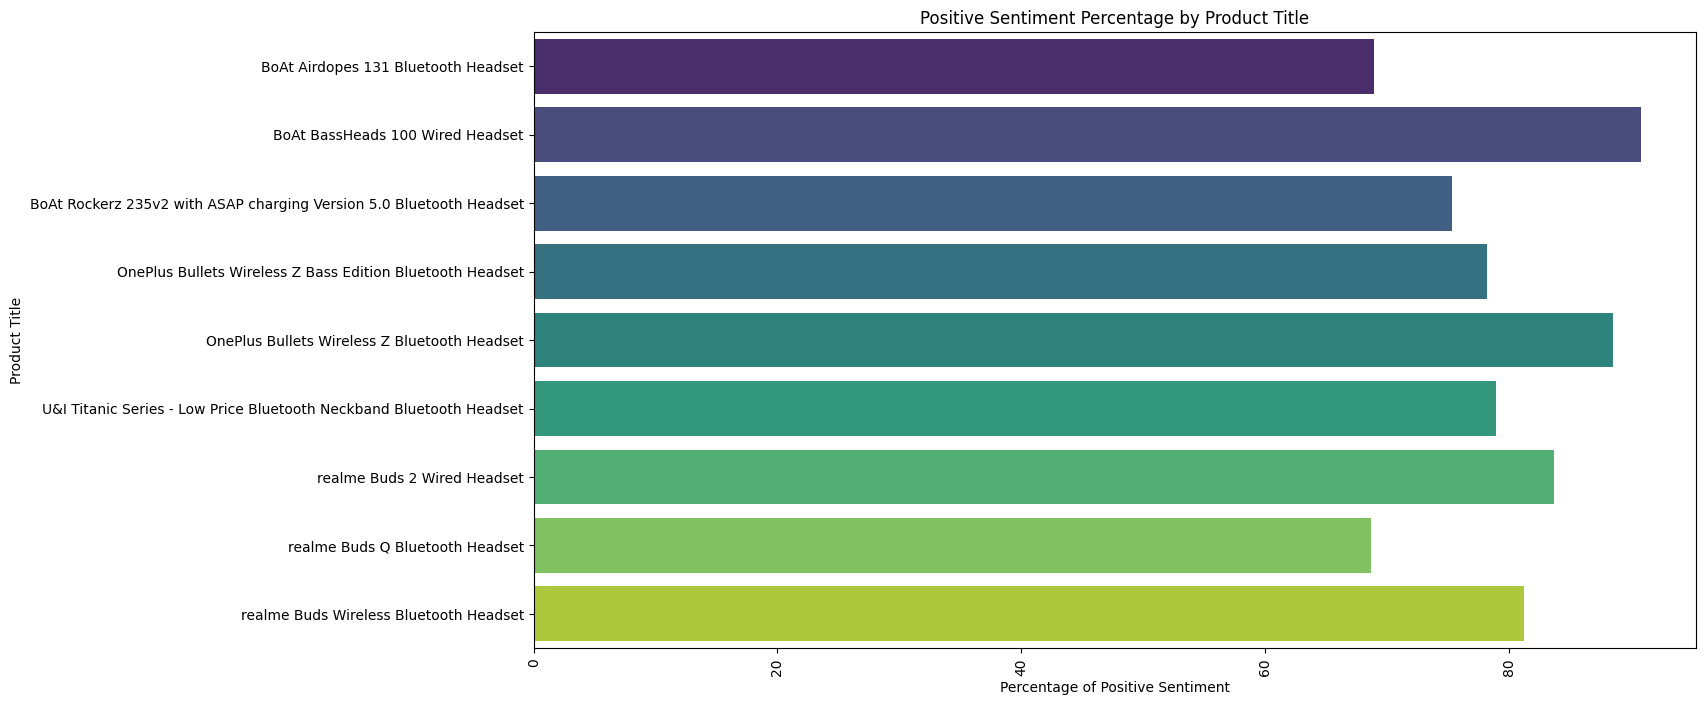

The best product is: BoAt BassHeads 100 Wired Headset


In [ ]:
# Plot the sentiment summary as a bar graph
plt.figure(figsize=(15, 8))
sns.barplot(data=sentiment_summary, x='positive_sentiment', y='product_title', palette='viridis')
plt.xlabel('Percentage of Positive Sentiment')
plt.ylabel('Product Title')
plt.title('Positive Sentiment Percentage by Product Title')
plt.xticks(rotation=90)
plt.show()

# Identify the best product based on positive sentiment
best_product = sentiment_summary.loc[sentiment_summary['positive_sentiment'].idxmax()]['product_title']
print(f"The best product is: {best_product}")


In [ ]:
# For aspect analysis, use BERT's attention mechanism or fine-tune BERT for aspect-based analysis if labeled data is available.
# This is a conceptual placeholder; actual implementation would require further fine-tuning.

aspects = {
    'sound quality': ['sound', 'audio', 'bass', 'treble', 'quality'],
    'battery life': ['battery', 'life', 'long-lasting', 'power'],
    'comfort': ['comfortable', 'comfort', 'fit', 'wear', 'ear']
}

for aspect in aspects.keys():
    aspect_df = df[df['cleaned_review'].apply(lambda x: any(keyword in x for keyword in aspects[aspect]))]
    positive_aspect_reviews = aspect_df['positive_sentiment'].sum()
    total_aspect_reviews = len(aspect_df)
    if total_aspect_reviews > 0:
        aspect_positive_percentage = (positive_aspect_reviews / total_aspect_reviews) * 100
        print(f"{aspect.capitalize()} has a positive sentiment percentage of {aspect_positive_percentage:.2f}% for {best_product}.")
    else:
        print(f"No reviews related to {aspect} for {best_product}.")


Sound quality has a positive sentiment percentage of 84.35% for BoAt BassHeads 100 Wired Headset.
Battery life has a positive sentiment percentage of 86.58% for BoAt BassHeads 100 Wired Headset.
Comfort has a positive sentiment percentage of 80.85% for BoAt BassHeads 100 Wired Headset.
